In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
data = pd.DataFrame({'День недели': ['Понедельник', 'Вторник',
                                    'Среда', 'Четверг', 'Пятница'],
                   'Улица': [80, 98, 75, 91, 78],
                   'Гараж': [100, 82, 105, 89, 102]})
data

,День недели,Улица,Гараж
0,Понедельник,80,100
1,Вторник,98,82
2,Среда,75,105
3,Четверг,91,89
4,Пятница,78,102


In [27]:
print(f'Корреляция между Улицей и Гаражом: {(data["Улица"].corr(data["Гараж"])):.2f}')

Корреляция между Улицей и Гаражом: -1.00


Коэффициент корреляции равен –1, что означает сильную
отрицательную корреляцию.

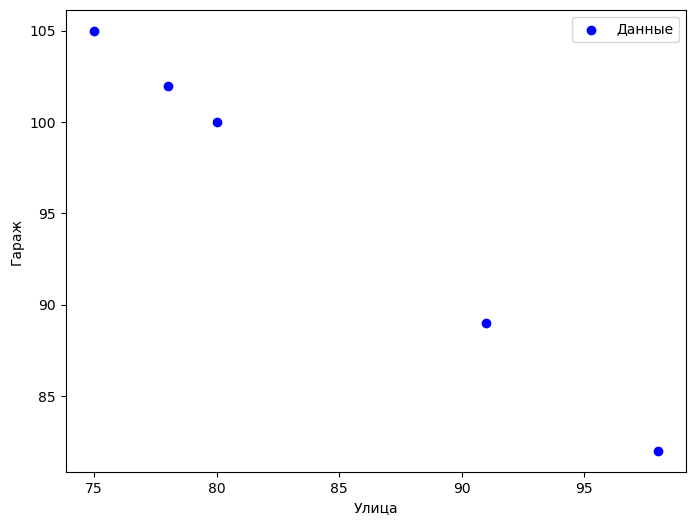

In [28]:
#Диаграмма рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(data['Улица'], data['Гараж'], c='b', label='Данные')

plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.legend()

plt.show()

# Найти и выгрузить данные. Вывести, провестипредобработку и описать признаки

In [29]:
data = pd.read_csv('wine.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


В наборе данных у нас есть 6497 наблюдений и в общей сложности 12
признаков.
- Fixed acidity: Количество кислотности в вине
- Volatile acidity: Количество уксусной кислоты, присутствующей в
вине
- Citric acid: Количество лимонной кислоты, присутствующей в вине
- Residual sugar: Количество сахара после ферментации
- Chlorides: Количество солей, присутствующих в вине
- Free sulfur dioxide: Количество свободной формы SO2
- Total sulfur dioxide: Количество свободной и связанной форм S02
- Density: Плотность вина (масса/объем)
- pH: рН вина колеблется в пределах 0-14
- Sulphates: Количество газообразного диоксида серы (S02) в вине
- Alcohol: Количество алкоголя, присутствующего в вине
- Quality: Конечное качество упомянутого вина

In [30]:
# Проверим на пропуски или Na 
print(data.isna().mean())
data.info()
for col in data.columns:
    print(col,data[data[col] == ' '].index)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 

In [31]:
corr_matrix = data.corr()['fixed acidity'].to_frame().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

,fixed acidity
fixed acidity,1.000000
volatile acidity,-0.260000
citric acid,0.670000
residual sugar,0.110000
chlorides,0.090000
free sulfur dioxide,-0.150000
total sulfur dioxide,-0.110000
density,0.670000
pH,-0.680000
sulphates,0.180000


Можем заметить, что самая сильная (отрицательная) корреляция с
признаком pH.

In [32]:
X = data[['fixed acidity']]
y = data[['pH']]
X = np.array(X, type(float))
y = np.array(y, type(float))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[-0.06056103]] [3.81495901] 0.012709087835248859


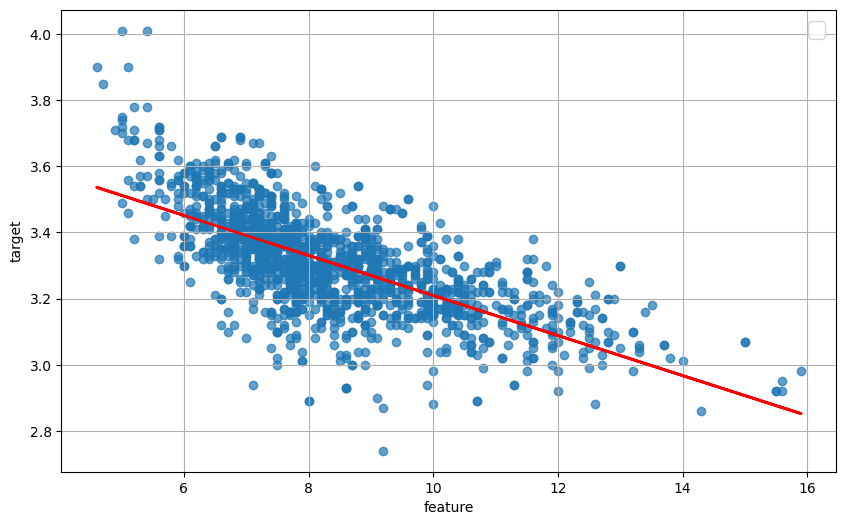

In [33]:
model = LinearRegression()
model.fit(X, y)
print(model.coef_, model.intercept_,
      mean_squared_error(model.coef_[0] * X + model.intercept_, y))

model_a = model.coef_[0]
model_b = model.intercept_
model_y_sk = model_a * X + model_b

fig = plt.figure(figsize=(10, 6))
plt.plot(X, model_y_sk, linewidth=2, color = "r")
plt.scatter(X, y, alpha=0.7)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

In [34]:
def mseerror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

def gr_mseerror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.array([2/len(X)*np.sum((y - y_pred)) * (-1),
                    2/len(X)*np.sum((y - y_pred) * (-X[:, 0]))])

In [35]:
eps = 1e-8
w1 = -0.06
w0 = 3.8
lr = 1e-6
next_w1 = -0.06001
next_w0 = 3.8001
n = 10000

for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0
    next_w0 = cur_w0 - lr * gr_mseerror(X, cur_w1, cur_w0, y)[0]
    next_w1 = cur_w1 - lr * gr_mseerror(X, cur_w1, cur_w0, y)[1]
    
    print(f'Итерация {i}')
    print(f'Текущая точка {cur_w1, cur_w0} | Следующая точка {next_w1, next_w0}')
    print(f'MSE {mseerror(X, cur_w1, cur_w0, y)}')
    
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        print('STOP')
        break

Итерация 0
Текущая точка (-0.06001, 3.8001) | Следующая точка (-0.059155229887906974, 3.800132858262)
MSE 55.70236746057856
Итерация 1
Текущая точка (-0.059155229887906974, 3.800132858262) | Следующая точка (-0.0584988220961645, 3.800142869258722)
MSE 55.05580830272681
Итерация 2
Текущая точка (-0.0584988220961645, 3.800142869258722) | Следующая точка (-0.05799433865120133, 3.8001353837232874)
MSE 54.674786634984855
Итерация 3
Текущая точка (-0.05799433865120133, 3.8001353837232874) | Следующая точка (-0.057606213080200995, 3.800114499739162)
MSE 54.44952721888008
Итерация 4
Текущая точка (-0.057606213080200995, 3.800114499739162) | Следующая точка (-0.05730720530587976, 3.8000833559954503)
MSE 54.315636934566804
Итерация 5
Текущая точка (-0.05730720530587976, 3.8000833559954503) | Следующая точка (-0.05707645237074205, 3.8000443563887862)
MSE 54.23534338613346
Итерация 6
Текущая точка (-0.05707645237074205, 3.8000443563887862) | Следующая точка (-0.056897975502365805, 3.79999934204412

KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-0.05628627524952037 3.799349027384329 54.07244538071878


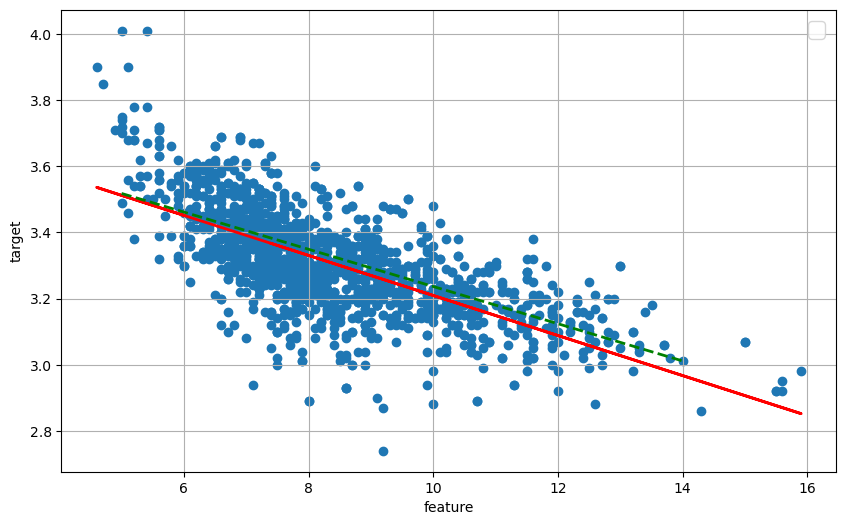

In [36]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(5, 15)

our_model_y = next_w1 * x + next_w0
print(next_w1, next_w0, mseerror(X, next_w1, next_w0, y))

plt.plot(X, model_y_sk, linewidth=2, color = "r")
plt.plot(x, our_model_y, '--g', linewidth=2)
plt.scatter(X, y)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

# Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов.

In [37]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
print(df.isna().mean())
df.info()
for col in df.columns:
    print(col,df[df[col] == ' '].index)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
age Int64Index([], dtype='int64')
sex Int64Index([], dtype='int64')
bmi Int64Index([], dtype='int64')
children Int64Index([], dtype='int64')
smoker Int64Index([], dtype='int64')
region Int64Index([], dtype='int64')
charges Int64Index([], dtype='int64')


In [39]:
regions = df['region'].unique()
print(regions)

['southwest' 'southeast' 'northwest' 'northeast']


# Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI)

In [40]:
data_southwest = df[df['region'] == 'southwest']['bmi']
data_southeast = df[df['region'] == 'southeast']['bmi']
data_northwest = df[df['region'] == 'northwest']['bmi']
data_northeast = df[df['region'] == 'northeast']['bmi']

f_statistic, p_value = stats.f_oneway(data_southwest, data_southeast, data_northwest, data_northeast)

print(f'F-статистика: {f_statistic:.5f}')
print(f'p-значение: {p_value}')

F-статистика: 39.49506
p-значение: 1.881838913929143e-24


In [41]:
formula = 'bmi ~ C(region)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df          F        PR(>F)
C(region)   4055.880631     3.0  39.495057  1.881839e-24
Residual   45664.319755  1334.0        NaN           NaN


P-значение намного меньше 0.05, это означает, что фактор «регион»
оказывает сильное влияние на «bmi» человека.

# С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони.

In [42]:
alpha = 0.05/len(regions)
bonferroni_alpha = alpha / (len(regions) * (len(regions) - 1) / 2)  # Поправка Бонферрони

for i in range(len(regions)):
    for j in range(i + 1, len(regions)):
        region1 = regions[i]
        region2 = regions[j]
        
        data1 = df[df['region'] == region1]['bmi']
        data2 = df[df['region'] == region2]['bmi']
        
        t_stat, p_value = stats.ttest_ind(data1, data2)
        
        if p_value < bonferroni_alpha:
            print(f"Сравнение {region1} и {region2}: p-значение = {p_value} (Статистически значимо)")
        else:
            print(f"Сравнение {region1} и {region2}: p-значение = {p_value} (Не статистически значимо)")


Сравнение southwest и southeast: p-значение = 5.4374009639680636e-09 (Статистически значимо)
Сравнение southwest и northwest: p-значение = 0.001076958496307695 (Статистически значимо)
Сравнение southwest и northeast: p-значение = 0.0019086161671573072 (Статистически значимо)
Сравнение southeast и northwest: p-значение = 2.643571405230106e-19 (Статистически значимо)
Сравнение southeast и northeast: p-значение = 1.186014937424813e-17 (Статистически значимо)
Сравнение northwest и northeast: p-значение = 0.951929170821864 (Не статистически значимо)


Из полученных результатов делаем вывод, что «bmi» в регионах
northwest и northeast не отличается.

# Выполнить пост-хок тесты Тьюки и построить график

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


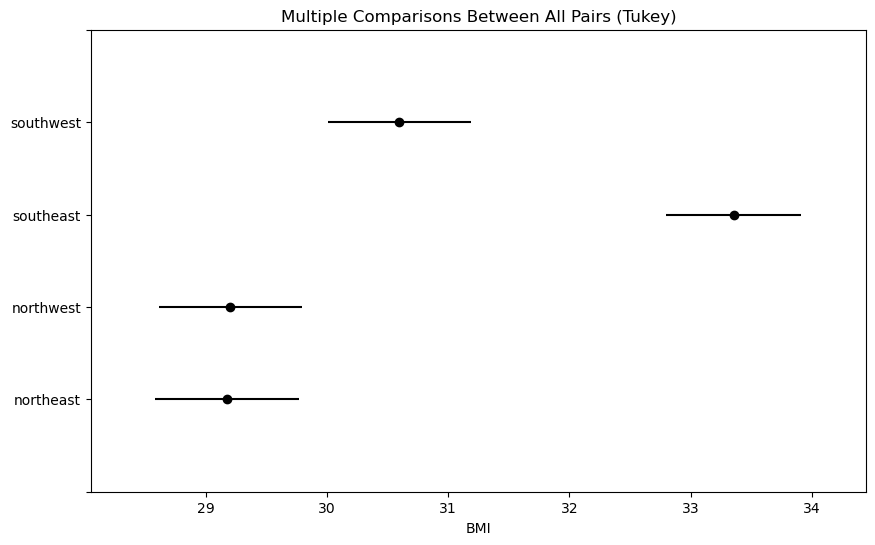

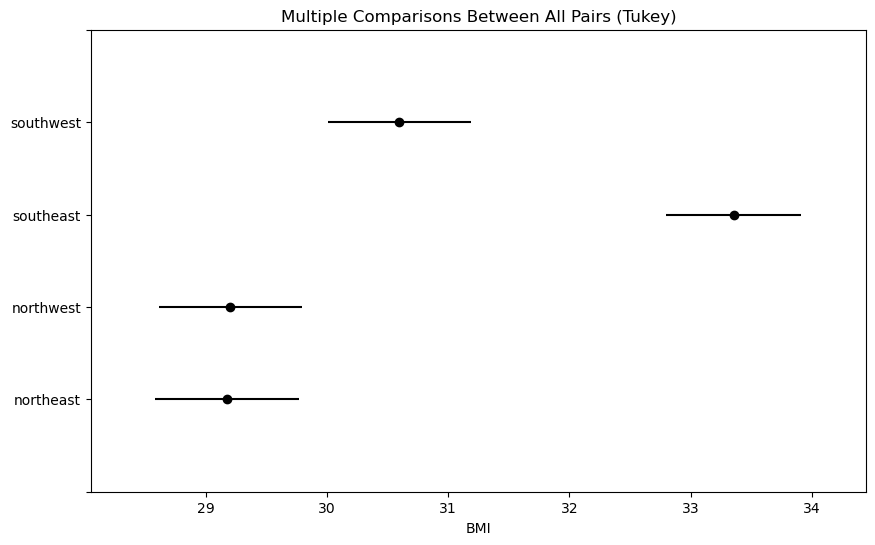

In [50]:
data = df[['region', 'bmi']]

# Выполните однофакторный ANOVA
result = pairwise_tukeyhsd(groups=data['region'],
                           endog=data['bmi'])

# Выведите результаты
print(result)

# Постройте график результатов
result.plot_simultaneous(xlabel='BMI')

# Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels

In [30]:
formula = 'bmi ~ C(region) + C(sex)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df          F        PR(>F)
C(region)   4034.975135     3.0  39.336119  2.342323e-24
C(sex)        86.007035     1.0   2.515393  1.129767e-01
Residual   45578.312720  1333.0        NaN           NaN


In [31]:
df['comb'] = df.region + '/' + df.sex

# Выполнить пост-хок тесты Тьюки и построить график.

group1,group2,meandiff,p-adj,lower,upper,reject
northeast/female,northeast/male,-0.2998,0.9998,-2.2706,1.6711,False
northeast/female,northwest/female,-0.0464,1.0,-2.0142,1.9215,False
northeast/female,northwest/male,-0.2042,1.0,-2.1811,1.7728,False
northeast/female,southeast/female,3.3469,0.0,1.41,5.2839,True
northeast/female,southeast/male,4.6657,0.0,2.7634,6.568,True
northeast/female,southwest/female,0.7362,0.9497,-1.2377,2.71,False
northeast/female,southwest/male,1.8051,0.1007,-0.1657,3.776,False
northeast/male,northwest/female,0.2534,0.9999,-1.7083,2.2152,False
northeast/male,northwest/male,0.0956,1.0,-1.8752,2.0665,False
northeast/male,southeast/female,3.6467,0.0,1.7159,5.5775,True


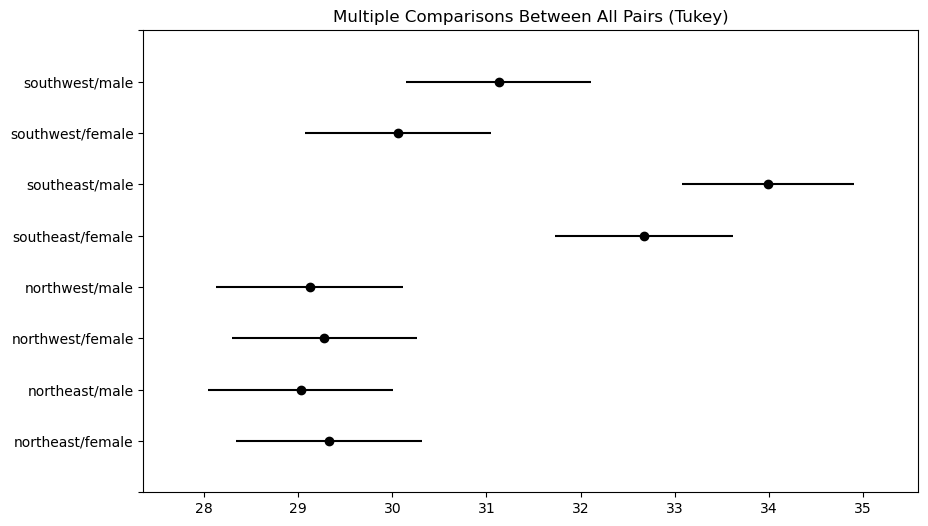

In [33]:
tukey = pairwise_tukeyhsd(endog=df['bmi'], groups=df['comb'], alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()